# House Price

### Importing the required libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

### Reading and displaying the data

In [ ]:
data = pd.read_csv("datasets/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Creating a smaller dataset with the necessary items

In [124]:
df = data[["LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MoSold","YrSold","SalePrice"]]
df.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,8450,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,2,2008,208500
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,5,2007,181500
2,11250,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,9,2008,223500
3,9550,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,2,2006,140000
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,12,2008,250000


### Preprocessing to check for empty cells and NaN values

In [125]:
df.isnull().sum()

,0
LotArea,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,8
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
2ndFlrSF,0


In [126]:
df.corr()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
LotArea,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.001205,-0.014261,0.263843
YearBuilt,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,0.012398,-0.013618,0.522897
YearRemodAdd,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,0.021490,0.035743,0.507101
MasVnrArea,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,-0.015727,0.014359,0.386420
BsmtFinSF2,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,0.034888,-0.041258,0.214479
TotalBsmtSF,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,0.013196,-0.014969,0.613581
1stFlrSF,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,0.031372,-0.013604,0.605852
2ndFlrSF,0.050986,0.010308,0.140024,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423,0.194561,0.070832,0.183926,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.035164,-0.028700,0.319334


### Assigning values to X and Y

In [127]:
X = df[["LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MoSold","YrSold"]].values
Y = df[["SalePrice"]].values
X.shape , Y.shape

((1460, 30), (1460, 1))

### Splitting the data

In [128]:
X_train , X_validation , Y_train , Y_validation = train_test_split(X,Y,test_size=0.2,random_state=42)
print("data shape:")
print(X_train.shape , X_validation.shape , Y_train.shape , Y_validation.shape)


data shape:
(1168, 30) (292, 30) (1168, 1) (292, 1)


### Removing NaN values

In [129]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

print(np.isnan(X_train).sum(), np.isinf(X_train).sum())


0 0


In [130]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_validation = imputer.fit_transform(X_validation)

print(np.isnan(X_validation).sum(), np.isinf(X_validation).sum())

0 0


### Creating a multi-layer artificial neural network model with the following structure:

1- Input layer: 30 neurons\
2- Two hidden layers: 128 and 64 neurons\
3- Output layer: 1 neuron

In [131]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30), # input
    tf.keras.layers.Dense(128 , activation="relu"), # Hidden 1
    tf.keras.layers.Dense(64 , activation="relu"), # Hidden 2
    tf.keras.layers.Dense(1,activation="linear"), # output --> Regression
])

In [141]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss="mse",
              metrics=["mae"])

In [133]:
result_train = model.fit(X_train, Y_train , epochs=500)

Epoch 1/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 39268233216.0000 - mae: 183178.1875
Epoch 2/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39273271296.0000 - mae: 182979.5625
Epoch 3/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42477953024.0000 - mae: 189707.9688
Epoch 4/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37536927744.0000 - mae: 179832.8281
Epoch 5/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37906714624.0000 - mae: 180422.6406
Epoch 6/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39890444288.0000 - mae: 182830.9844
Epoch 7/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39715631104.0000 - mae: 182852.5312
Epoch 8/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36761006080.0000 - mae: 178437.2812
Epoch 9/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41139617792.0000 - mae: 184155.4219
Epoch 10/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36986150912.0000 - mae: 177939.3438
Epoch 11/500
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [142]:
result_test = model.fit(X_validation, Y_validation , epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 4793921024.0000 - mae: 48954.6094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4740528128.0000 - mae: 43285.4609 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4038844160.0000 - mae: 45486.7969 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4234482176.0000 - mae: 47769.4375 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4960294400.0000 - mae: 48920.8789 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4359613952.0000 - mae: 46138.2812 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3979220736.0000 - mae: 41061.3359 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4217046272.0000 - mae: 42794.7617
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4249203200.0000 - mae: 45191.1133 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3074487296.0000 - mae: 38191.8203 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 

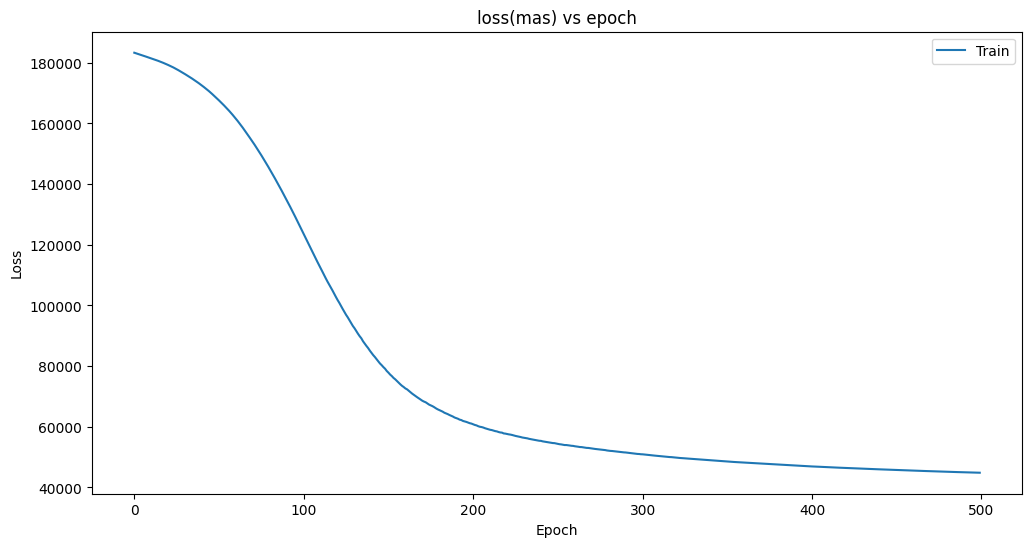

In [135]:
plt.figure(figsize=(12,6))
plt.plot(result_train.history["mae"],label="Train")
plt.title("loss(mas) vs epoch")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

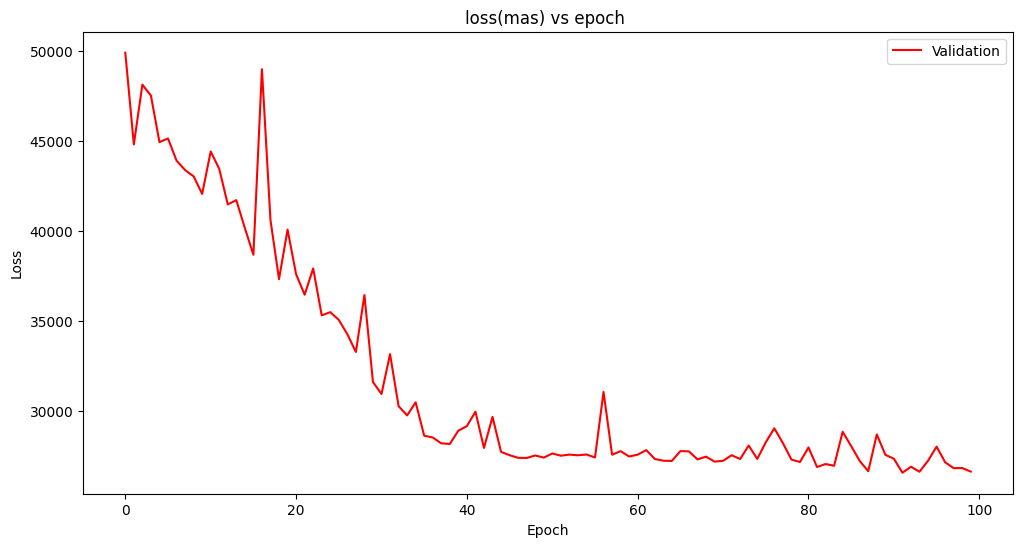

In [143]:
plt.figure(figsize=(12,6))
plt.plot(result_test.history["mae"],label="Validation",color="red")
plt.title("loss(mas) vs epoch ")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

|data|loss(mse)|loss(mae)|
|----|---------|---------|
|train|4355442688.0000|42278.5625|
|validation|1324605056.0000 |25897.0820|

In [150]:
# test value
my_house = np.array([250,1976,1976,0.0	,978	,0	,284	,1262,1262	,0	,1262	,0	,1	,2	,0	,3,	1	,6,	1	,1976.0	,2	,460	,298	,0,0	,0	,0	,0	,5	,2007]).reshape(-1,30)
my_house_price = model.predict(my_house)
print("my_house_price:",my_house_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
my_house_price: [[174119.17]]


In [151]:
model.save("my_MLP_model_House_Price.h5")